# Decision Trees and Ensemble Models

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

## Decision Trees
### Classification

[[ 0.02458305  2.96215652]
 [-1.52392631  7.12573205]
 [ 1.27450825  5.63017322]
 [-0.86552334  7.80121774]
 [ 0.74874067  2.55579434]]
[1 3 0 3 1 1 2 0 3 3]


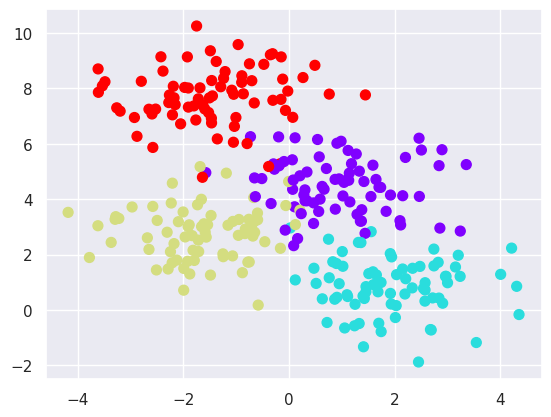

In [ ]:
# Set up training and test data
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X[0:5,:]) #look at X
print(y[0:10]) #look at y, it has four class labels
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

In [ ]:
# Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree.score(X_test, y_test) # Default scoring is Accuracy

0.8933333333333333

In [ ]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train, y_train)
rf.score(X_test, y_test) # Default scoring is Accuracy

0.92

In [ ]:
# Bagging Classification
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier() #Need to instantiate a model type for bagging first
bag = BaggingClassifier(tree, n_estimators=100, random_state=1)
bag.fit(X_train, y_train)
bag.score(X_test, y_test) # Default scoring is Accuracy

0.9066666666666666

In [ ]:
# Gradient Boosted Classification
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(n_estimators=100, max_depth=2, learning_rate=.01)

boost.fit(X_train, y_train)
boost.score(X_test, y_test) # Default scoring is Accuracy

0.9066666666666666

### Regression

In [ ]:
# Set up training and test data
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=42)

In [ ]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=0)

tree.fit(X_train, y_train)
tree.score(X_test, y_test) # Default scoring is R-squared

0.013158399953219546

In [ ]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200)

rf.fit(X_train, y_train)
rf.score(X_test, y_test) # Default scoring is R-squared

0.4488856411662461

In [ ]:
# Extract Feature Importances
display(pd.DataFrame({'Importance':rf.feature_importances_},
    index=diabetes.feature_names).sort_values(by='Importance', ascending=False))

,Importance
bmi,0.343140
s5,0.218388
bp,0.106658
s6,0.067003
age,0.064737
s3,0.058266
s2,0.054422
s1,0.049079
s4,0.027278
sex,0.011029


In [ ]:
# Bagging Regression
from sklearn.ensemble import BaggingRegressor

tree = DecisionTreeRegressor() #Need to instantiate a model type for bagging first
bag = BaggingRegressor(tree, n_estimators=100,
                        random_state=1)

bag.fit(X_train, y_train)
bag.score(X_test, y_test) # Default scoring is R-squared

0.4915420576645907

In [ ]:
# Gradient Boosted Regression
from sklearn.ensemble import GradientBoostingRegressor

boost = GradientBoostingRegressor(n_estimators=100, max_depth=2, learning_rate=.01)

boost.fit(X_train, y_train)
boost.score(X_test, y_test) # Default scoring is R-squared

0.3798851640583496

In [ ]:
# Add more trees
boost = GradientBoostingRegressor(n_estimators=5000, max_depth=2, learning_rate=.01)
boost.fit(X_train, y_train)
boost.score(X_test, y_test)

0.3902075275903717

In [ ]:
# Try learning slower
boost = GradientBoostingRegressor(n_estimators=5000, max_depth=2, learning_rate=.001)
boost.fit(X_train, y_train)
boost.score(X_test, y_test)

0.4764002926657753

In [ ]:
# As with other tree models we can extract important features
boost.feature_importances_

array([0.0234227 , 0.00794715, 0.39660332, 0.12728419, 0.03112032,
       0.01316043, 0.04422611, 0.03520003, 0.29095637, 0.03007939])

### Parameters of Interest for Tree Models
Below are some examples of common parameters to tweak for tree models. This list in certainly not exhaustive, and the full list of parameters can be found in the documentation (e.g. [here](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html)). Not all parameters are applicable to all models. For instance, `learning_rate` is particular to gradient boosted models.

*   `criterion`: 'gini' or 'entropy' for classification and 'squared_error' for regression
*   `max_depth`: the number of times internal nodes are split
*   `max_leaf_nodes`: The size of each tree can be controlled either by setting the tree depth via `max_depth` or by setting the number of leaf nodes via `max_leaf_nodes`
*   `min_samples_leaf`: threshold for the minimum number of observations per terminal node
*   `n_estimators`: number of trees to generate for the model
*   `max_features`: number of randomly selected features per split
*   `max_samples`: max_samples changes whether you want to draw bootstrap datasets that are the same size as your original dataset or not.  Leave this at a default of 1.
*   `learning_rate`: learning rate shrinks the contribution of each tree by `learning_rate` for boosted models. There is a trade-off between `learning_rate` and `n_estimators`.

---
## **Example:** Random Forest for Classifying Digits

Classifying hand-written digits in image data with random forests.

In [ ]:
# Load the data
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

To remind us what we're looking at, we'll visualize the first few data points:

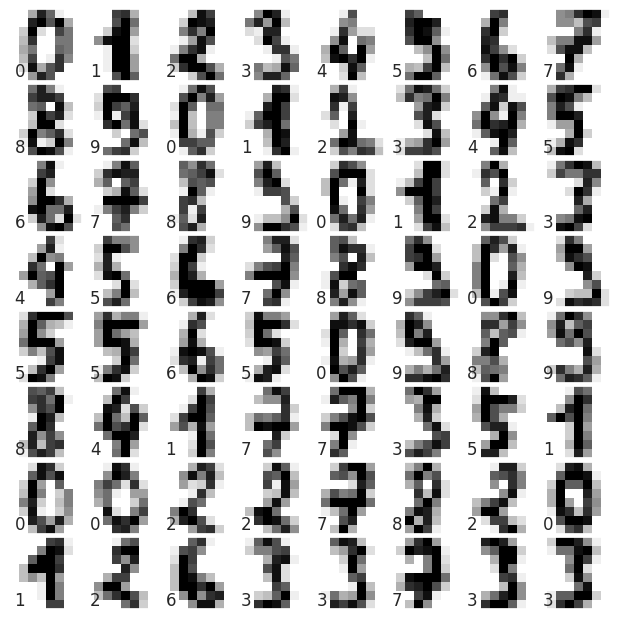

In [ ]:
# Set up the figure
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # Label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

We can quickly classify the digits using a random forest as follows:

In [ ]:
# Fit the model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target,
                                                random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test,y_test)

0.9822222222222222

In [ ]:
# Classification Report
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       1.00      0.96      0.98        45
           2       0.95      1.00      0.98        42
           3       0.98      1.00      0.99        44
           4       0.97      1.00      0.99        37
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.96      0.98      0.97        47
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



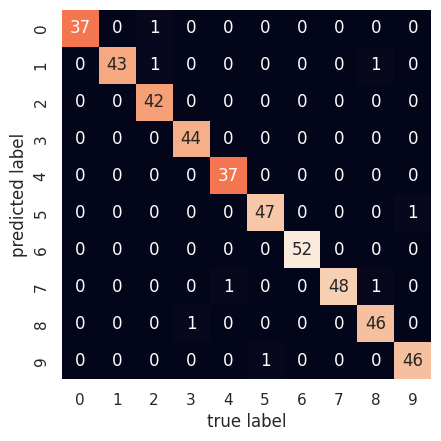

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

We find that a simple, untuned random forest results in a very accurate classification of the digits data.

### Summary of Random Forests

This section contained a brief introduction to the concept of *ensemble estimators*, and in particular the random forest – an ensemble of randomized decision trees.
Random forests are a powerful method with several advantages:

- Both training and prediction are very fast, because of the simplicity of the underlying decision trees. In addition, both tasks can be straightforwardly parallelized, because the individual trees are entirely independent entities.

- The nonparametric model is extremely flexible, and can thus perform well on tasks that are under-fit by other estimators.

A primary disadvantage of random forests is that the results are not easily interpretable: that is, if you would like to draw conclusions about the *meaning* of the classification model, random forests may not be the best choice.

*Source: Jake VanderPlas, Python Data Science Handbook*

---
## Building Ensembles of Classification Models

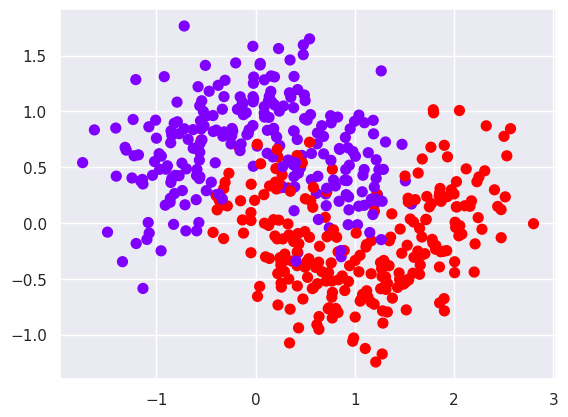

In [ ]:
# Generate the data
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

In [ ]:
# Build multiple classification models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Generally works better if models you choose have diverse methodological approaches
log_clf = LogisticRegression(random_state=0) # Logistic Regression w/ C=default
rnd_clf = RandomForestClassifier(random_state=0) # Random Forest
svm_clf = SVC(random_state=0) # Support Vector Machine

In [ ]:
# Goal is to predict y_test for each model and then use PREDICTIONS FROM EACH MODEL to select final predictions

# Need to set up a standard for selecting final prediction:
from sklearn.ensemble import VotingClassifier

# Estimators arg is giving each estimator a name for references in functions like GridsearchCV
# voting='hard' takes majority vote of each predicted value to select final prediction for y_test
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

In [ ]:
voting_clf.fit(X_train, y_train)
print(voting_clf.score(X_test, y_test)) #return accuracy of voting classifier

0.904


In [ ]:
# Compare to the accuracy of the individual models
log_clf = LogisticRegression(random_state=0) # Logistic Regression w/ C=default
rnd_clf = RandomForestClassifier(random_state=0) # Random Forest
svm_clf = SVC(random_state=0) # Support Vector Machine

print(log_clf.fit(X_train, y_train).score(X_test, y_test))
print(rnd_clf.fit(X_train, y_train).score(X_test, y_test))
print(svm_clf.fit(X_train, y_train).score(X_test, y_test))

0.864
0.896
0.896


Looks like we improved on these models using the ensemble approach! Can we improve it further?

In [ ]:
# 'soft' voting takes the predicted probabilities of each model and choose the highest value
# We need to ensure that probabilities are generated in each model.
log_clf = LogisticRegression(random_state=0)
rnd_clf = RandomForestClassifier(random_state=0)
svm_clf = SVC(probability=True, random_state=0) #Note the additional argument

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft') #Note the change to 'soft' voting
voting_clf.fit(X_train, y_train)
print(voting_clf.score(X_test, y_test)) #return accuracy of voting classifier

0.912


Here we get similar performance from both the hard and soft voting approach. This may vary more depending on the number or type of models being considered in the ensemble.

---
## **Extra Practice:** Can you build a voting classifier on the following dataset?

In [ ]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

X = bc.data
y = bc.target